## Matheus Araujo Pinheiro

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Será utilizado 3 metodos para o estudo a seguir:

1. **Diferença Finita Progressiva (DFP)**:
   - f'(x) ≈ (f(x + h) - f(x)) / h com Erro: O(h)
   
2. **Diferença Finita Regressiva (DFR)**:
   - f'(x) ≈ (f(x) - f(x - h)) / h com Erro: O(h)
   
3. **Diferença Finita Central (DFC)**:
   - f'(x) ≈ (f(x + h) - f(x - h)) / (2h) com Erro: O(h²)

In [2]:
# Diferença Finita Progressiva
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

# Diferença Finita Regressiva
def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

# Diferença Finita Central
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [3]:
# Função e derivadas exatas
u = lambda x: np.exp(-x**2)
du_exact = lambda x: -2*x*np.exp(-x**2)
d2u_exact = lambda x: (4*x**2 - 2) * np.exp(-x**2)

x0 = 1.5
hs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

In [4]:
# Aproximações e erros
erros = {"Progressiva": [], "Regressiva": [], "Central": []}
aproximacoes = {"Progressiva": [], "Regressiva": [], "Central": []}

for h in hs:
    aprox_fd = forward_difference(u, x0, h)
    aprox_bd = backward_difference(u, x0, h)
    aprox_cd = central_difference(u, x0, h)
    
    erro_fd = abs(aprox_fd - d2u_exact(x0))
    erro_bd = abs(aprox_bd - d2u_exact(x0))
    erro_cd = abs(aprox_cd - d2u_exact(x0))
    
    erros["Progressiva"].append(erro_fd)
    erros["Regressiva"].append(erro_bd)
    erros["Central"].append(erro_cd)
    
    aproximacoes["Progressiva"].append(aprox_fd)
    aproximacoes["Regressiva"].append(aprox_bd)
    aproximacoes["Central"].append(aprox_cd)

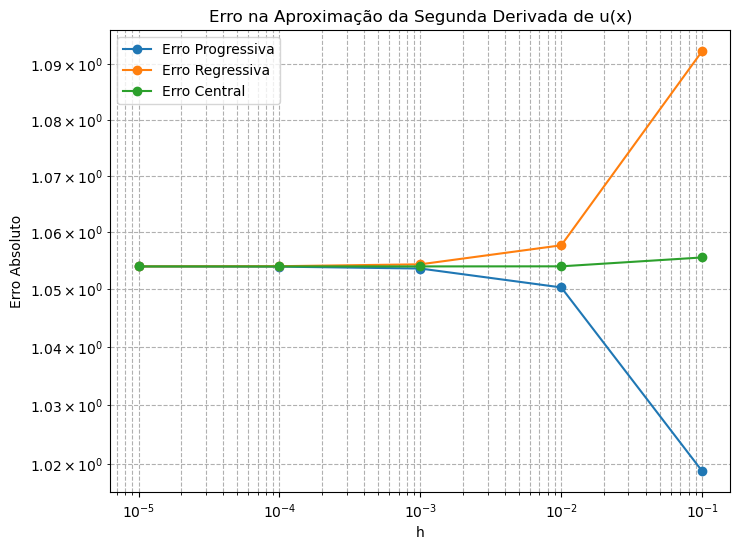

In [5]:
# Gráfico de erro
plt.figure(figsize=(8, 6))
for metodo, valores in erros.items():
    plt.loglog(hs, valores, marker='o', linestyle='-', label=f'Erro {metodo}')
plt.xlabel("h")
plt.ylabel("Erro Absoluto")
plt.title("Erro na Aproximação da Segunda Derivada de u(x)")
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

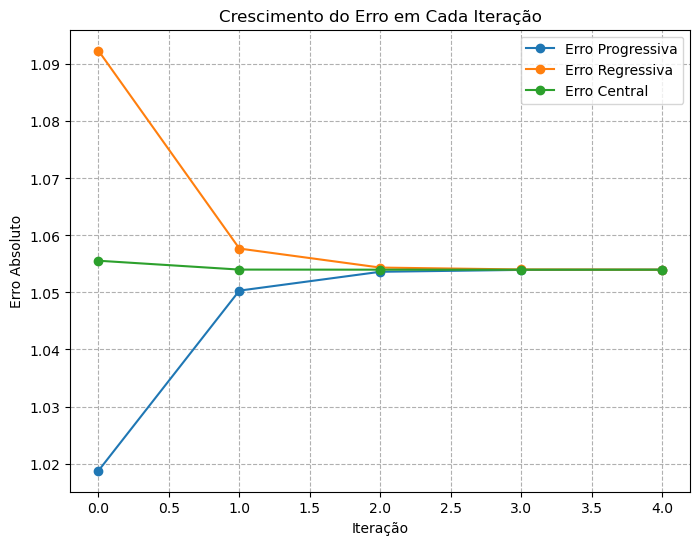

In [6]:
# Gráfico do crescimento do erro em cada iteração
plt.figure(figsize=(8, 6))
for metodo, valores in erros.items():
    plt.plot(range(len(hs)), valores, marker='o', linestyle='-', label=f'Erro {metodo}')
plt.xlabel("Iteração")
plt.ylabel("Erro Absoluto")
plt.title("Crescimento do Erro em Cada Iteração")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [7]:
# Impressão dos resultados
print("h\tProgressiva\tRegressiva\tCentral")
for i, h in enumerate(hs):
    print(f"{h:.1e}\t{aproximacoes['Progressiva'][i]:.6f}\t{aproximacoes['Regressiva'][i]:.6f}\t{aproximacoes['Central'][i]:.6f}")


h	Progressiva	Regressiva	Central
1.0e-01	-0.280945	-0.354592	-0.317768
1.0e-02	-0.312525	-0.319902	-0.316213
1.0e-03	-0.315829	-0.316567	-0.316198
1.0e-04	-0.316161	-0.316235	-0.316198
1.0e-05	-0.316194	-0.316201	-0.316198


 A análise mostra que a diferença finita central é a mais precisa, pois apresenta um erro menor em comparação com as diferenças finitas progressiva e regressiva.
 À medida que h diminui, o erro da diferença central converge mais rapidamente para zero, enquanto os erros das diferenças progressiva e regressiva apresentam maior instabilidade.
 Isso ocorre porque a diferença central usa informações simétricas ao redor de x, resultando em uma taxa de erro de ordem O(h²), enquanto as outras têm erro de ordem O(h).
